In [97]:
#libraries and tools

In [98]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import joblib
import xgboost

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import r2_score ,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
import joblib

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})


In [99]:
#importing dataset and exploration

In [100]:
df=pd.read_csv('Cars.csv')
df.drop('Unnamed: 0' , axis=1,inplace=True)
print(df.shape)
df.sample(10)

(14741, 11)


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
10890,Fiat,128,Sedan,Blue- Navy Blue,1986,Benzine,More than 200000,1000 - 1300 CC,Manual,17.0,Sharqia
6218,Chevrolet,Cruze,Sedan,Red,2010,Benzine,100000 to 119999,1600 CC,Automatic,160.0,Suez
4649,Hyundai,Matrix,Hatchback,Red,2008,Benzine,90000 to 99999,1600 CC,Automatic,178.2,Gharbia
12696,Fiat,128,Sedan,Yellow,1985,Benzine,More than 200000,1000 - 1300 CC,Manual,23.0,Cairo
1081,Hyundai,Elantra,Sedan,Red,1993,Benzine,More than 200000,1400 - 1500 CC,Manual,60.0,Qalyubia
4882,Hyundai,Verna,Sedan,Silver,2010,Benzine,140000 to 159999,1600 CC,Manual,124.2,Monufia
4347,Hyundai,Elantra,Sedan,Burgundy,2019,Benzine,140000 to 159999,1600 CC,Automatic,287.5,Cairo
4219,Hyundai,Elantra,Sedan,Gray,2018,Benzine,0 to 9999,1600 CC,Automatic,212.8,Cairo
9638,Chevrolet,Optra,Sedan,Gray,2017,Benzine,100000 to 119999,1400 - 1500 CC,Automatic,184.0,Alexandria
10676,Fiat,128,Sedan,White,1984,Benzine,180000 to 199999,1000 - 1300 CC,Manual,18.0,Sharqia


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14741 non-null  object 
 1   Model         14741 non-null  object 
 2   Body          14741 non-null  object 
 3   Color         14741 non-null  object 
 4   Year          14741 non-null  int64  
 5   Fuel          14741 non-null  object 
 6   Kilometers    14741 non-null  object 
 7   Engine        14741 non-null  object 
 8   Transmission  14741 non-null  object 
 9   Price         14741 non-null  float64
 10  Gov           14741 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [102]:
df.isna().sum()

Brand           0
Model           0
Body            0
Color           0
Year            0
Fuel            0
Kilometers      0
Engine          0
Transmission    0
Price           0
Gov             0
dtype: int64

In [103]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14736    False
14737    False
14738    False
14739    False
14740    False
Length: 14741, dtype: bool

In [104]:
pd.DataFrame({'': df.columns , 'Number of unique values' : df.nunique().values})

,,Number of unique values
0,Brand,3
1,Model,18
2,Body,3
3,Color,14
4,Year,53
5,Fuel,2
6,Kilometers,16
7,Engine,3
8,Transmission,2
9,Price,631


In [105]:
df.Brand.value_counts()

Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: Brand, dtype: int64

In [106]:
#EDA & Visualization

In [107]:
df['Brand'].value_counts().sort_values(ascending=False).head()

Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: Brand, dtype: int64

In [108]:
df['Model'].value_counts()

128        2425
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: Model, dtype: int64

In [109]:
df['Gov'].value_counts().sort_values()

New Valley           8
Matruh              36
Aswan               42
Luxor               42
South Sinai         56
Qena               100
Port Said          128
Red Sea            132
Sohag              158
Kafr al-Sheikh     174
Beni Suef          186
Damietta           210
Asyut              216
Minya              236
Beheira            246
Fayoum             276
Suez               308
Ismailia           360
Monufia            444
Dakahlia           590
Gharbia            630
Qalyubia           806
Sharqia            851
Alexandria        1636
Giza              2412
Cairo             4458
Name: Gov, dtype: int64

In [110]:
df['Kilometers'].value_counts()

More than 200000    2505
10000 to 19999      1666
180000 to 199999    1349
100000 to 119999    1192
0 to 9999           1088
140000 to 159999    1064
120000 to 139999    1005
90000 to 99999       996
160000 to 179999     760
20000 to 29999       612
80000 to 89999       560
50000 to 59999       436
60000 to 69999       402
40000 to 49999       372
30000 to 39999       370
70000 to 79999       364
Name: Kilometers, dtype: int64

In [111]:
df.describe()

,Year,Price
count,14741.000000,14741.000000
mean,2005.456821,116.584987
std,12.655566,82.192718
min,1970.000000,3.000000
25%,1998.000000,43.700000
50%,2010.000000,110.000000
75%,2015.000000,161.000000
max,2022.000000,471.500000


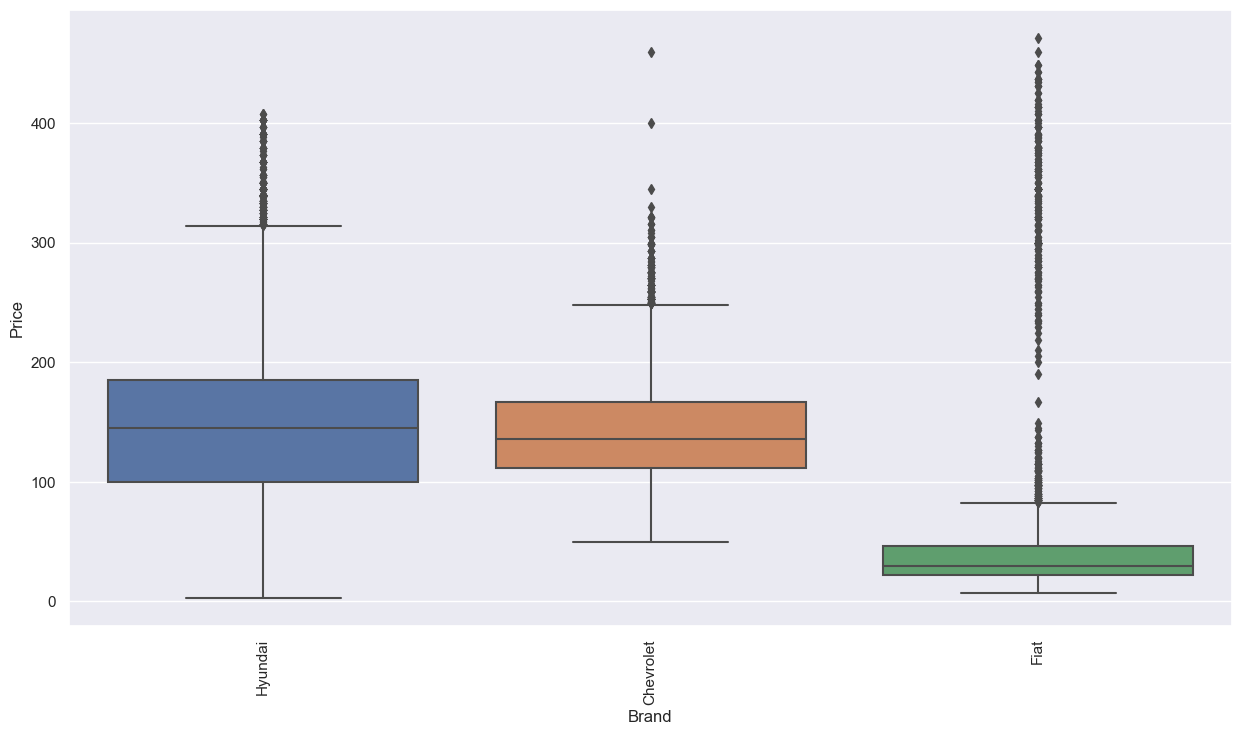

In [112]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Brand',y='Price')
plt.xticks(rotation=90)
plt.show()

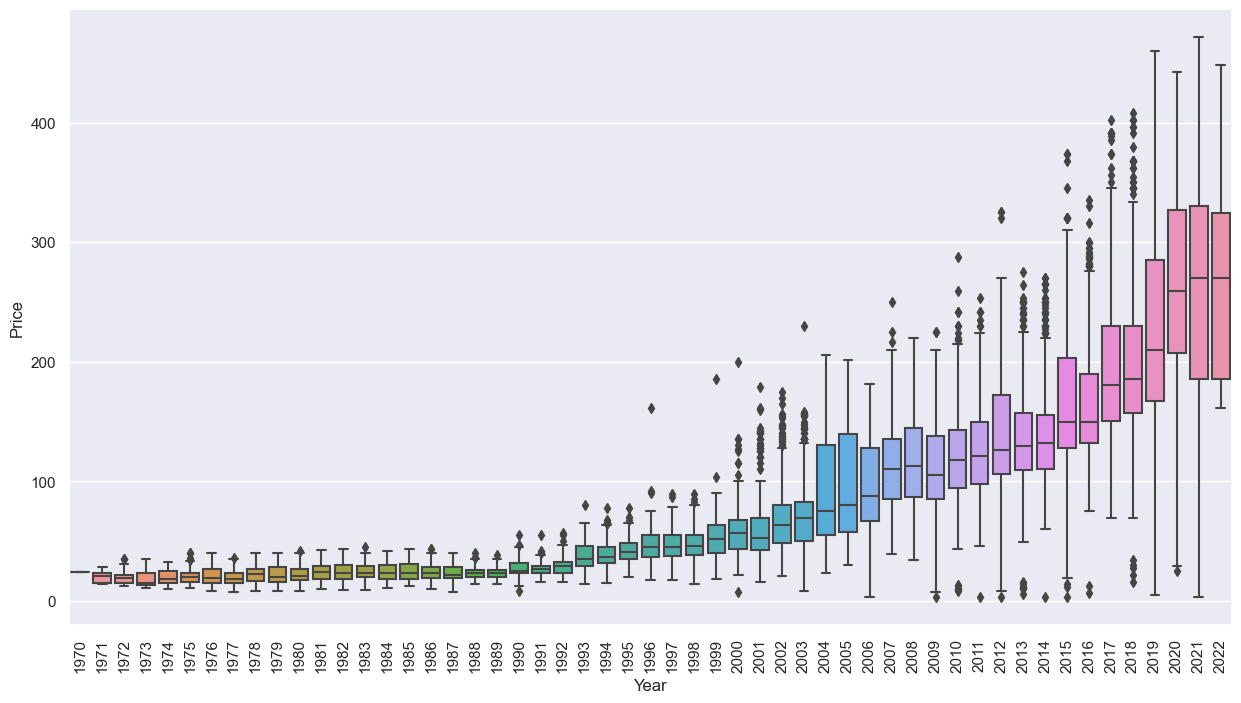

In [113]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Year',y='Price')
plt.xticks(rotation=90)
plt.show()

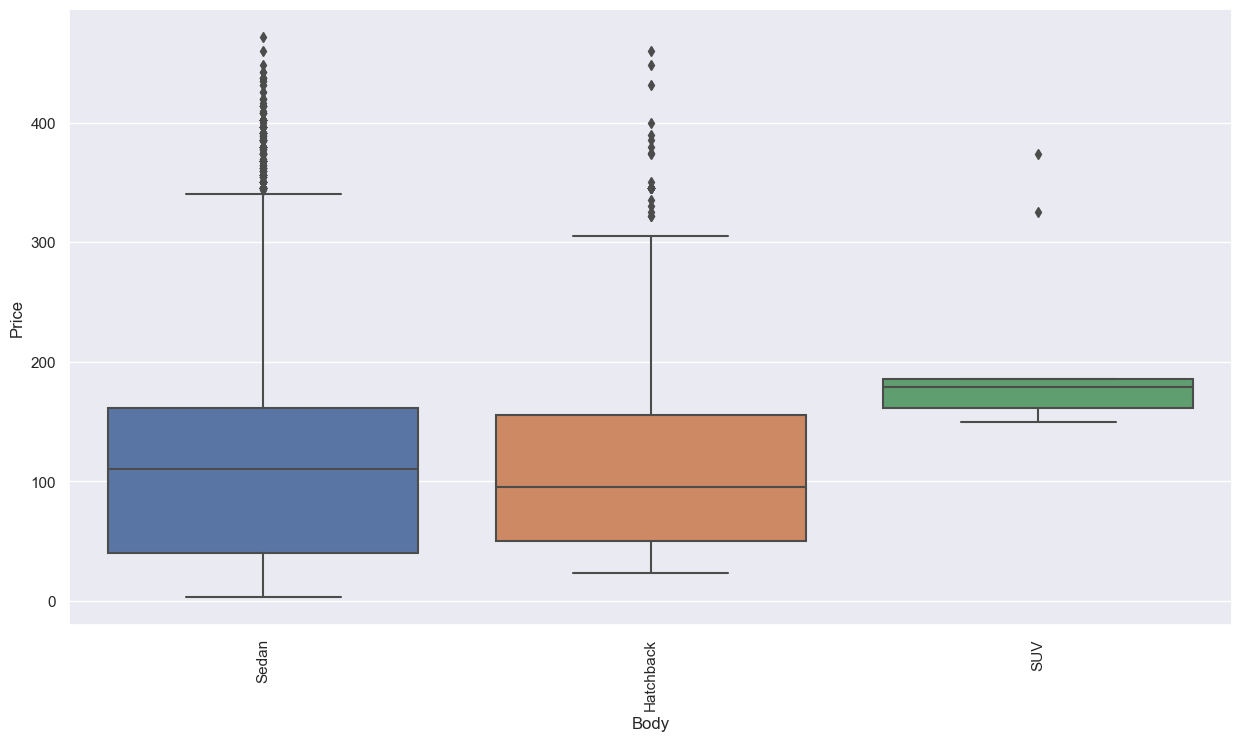

In [114]:
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='Body',y='Price')
plt.xticks(rotation=90)
plt.show()

Manual       9862
Automatic    4879
Name: Transmission, dtype: int64


<Axes: xlabel='Transmission', ylabel='Price'>

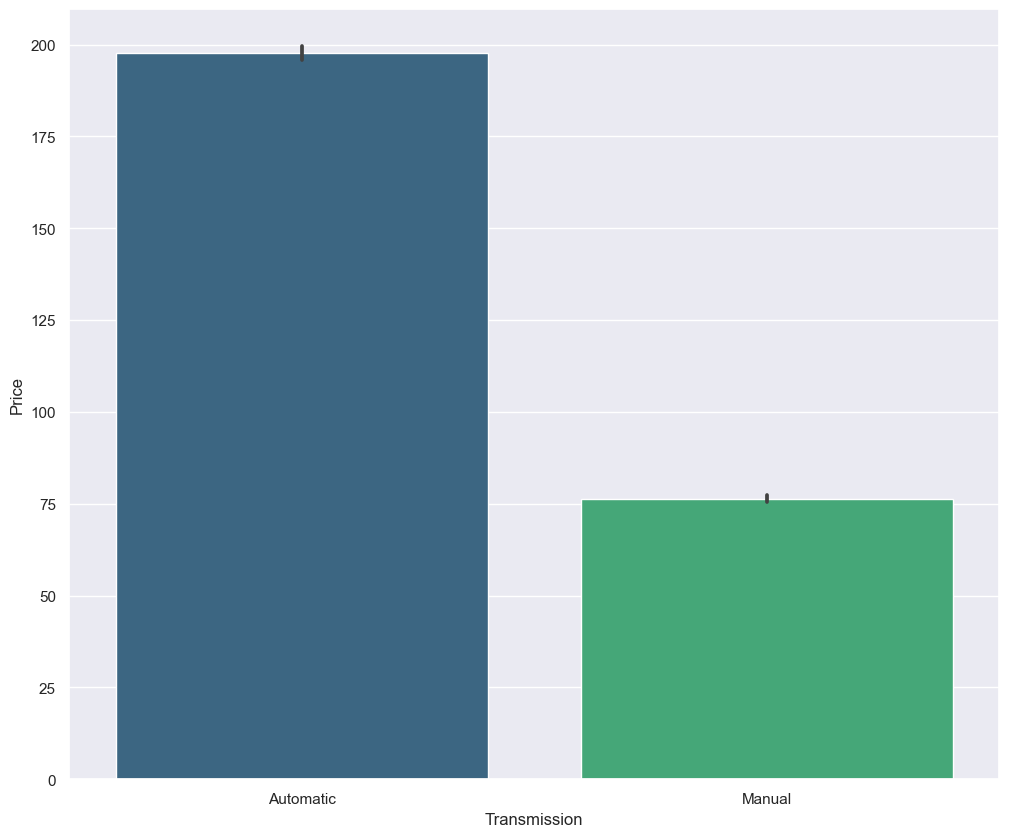

In [115]:
print(df.Transmission.value_counts())
sns.barplot(x=df["Transmission"],y=df['Price'],palette='viridis')

<Axes: >

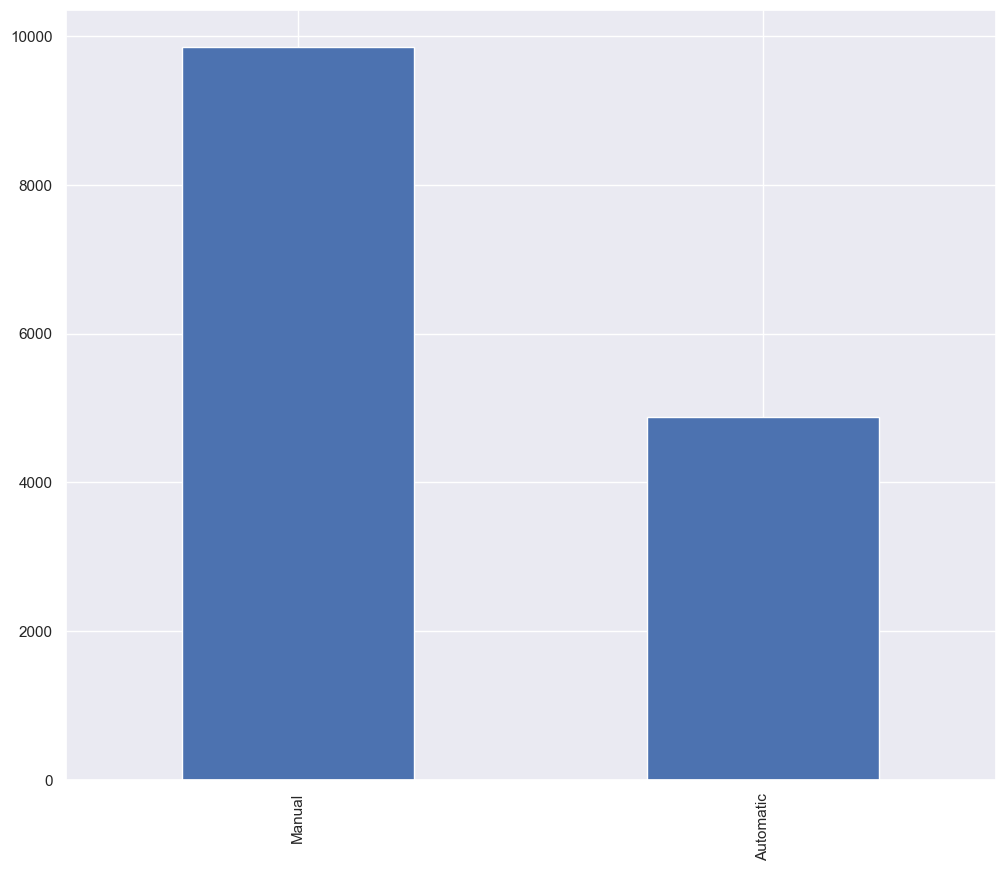

In [116]:
df['Transmission'].value_counts().plot(kind="bar")

Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: Brand, dtype: int64


<Axes: xlabel='Brand', ylabel='Price'>

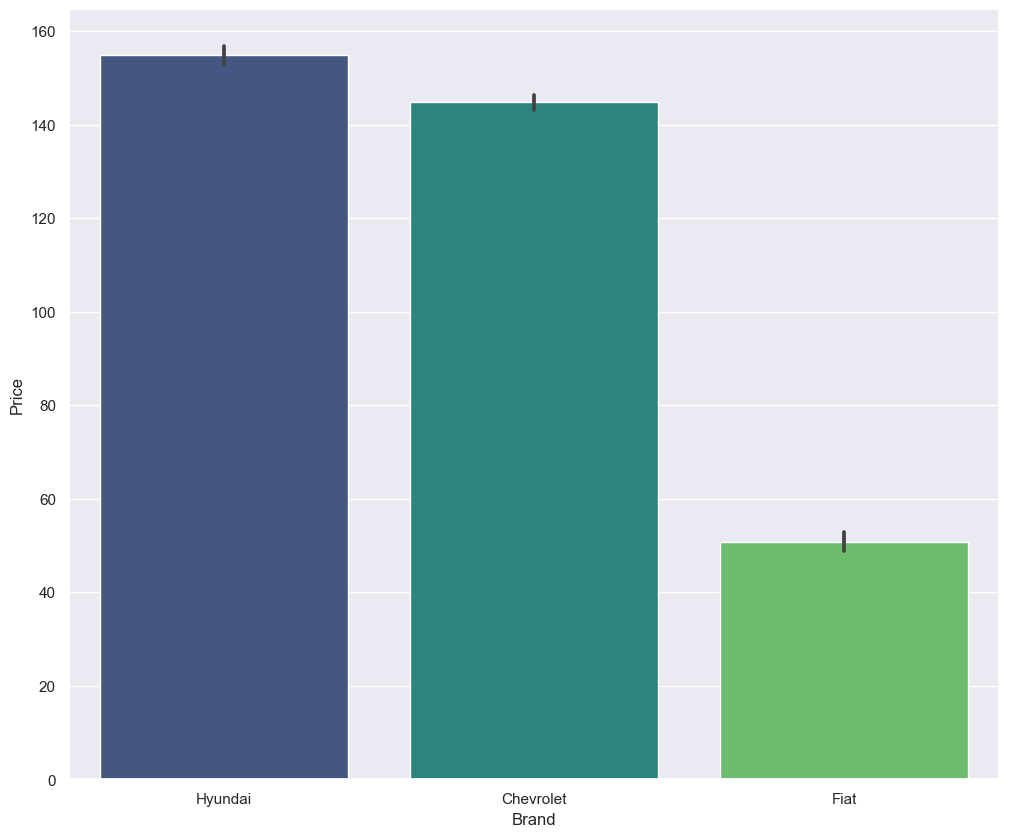

In [117]:
print (df.Brand.value_counts())
sns.barplot(x=df["Brand"],y=df["Price"],palette='viridis')

<Axes: >

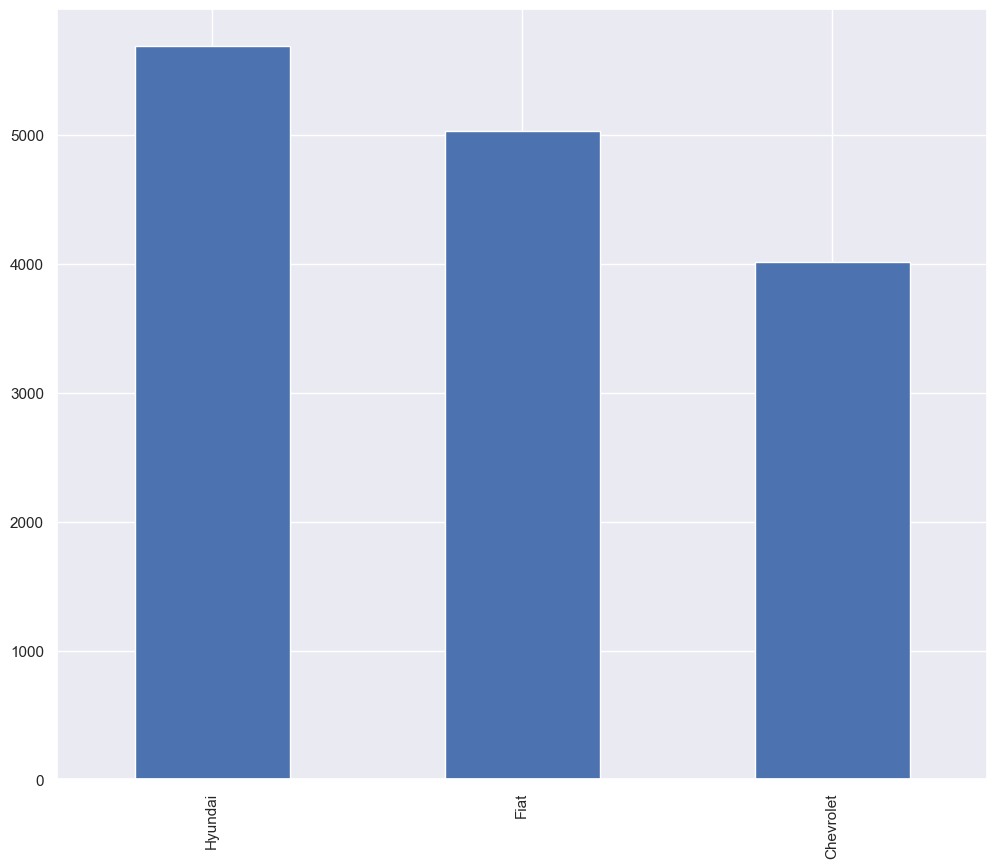

In [118]:
df['Brand'].value_counts().plot(kind="bar")

1600 CC           6762
1400 - 1500 CC    4356
1000 - 1300 CC    3623
Name: Engine, dtype: int64


<Axes: xlabel='Engine', ylabel='Price'>

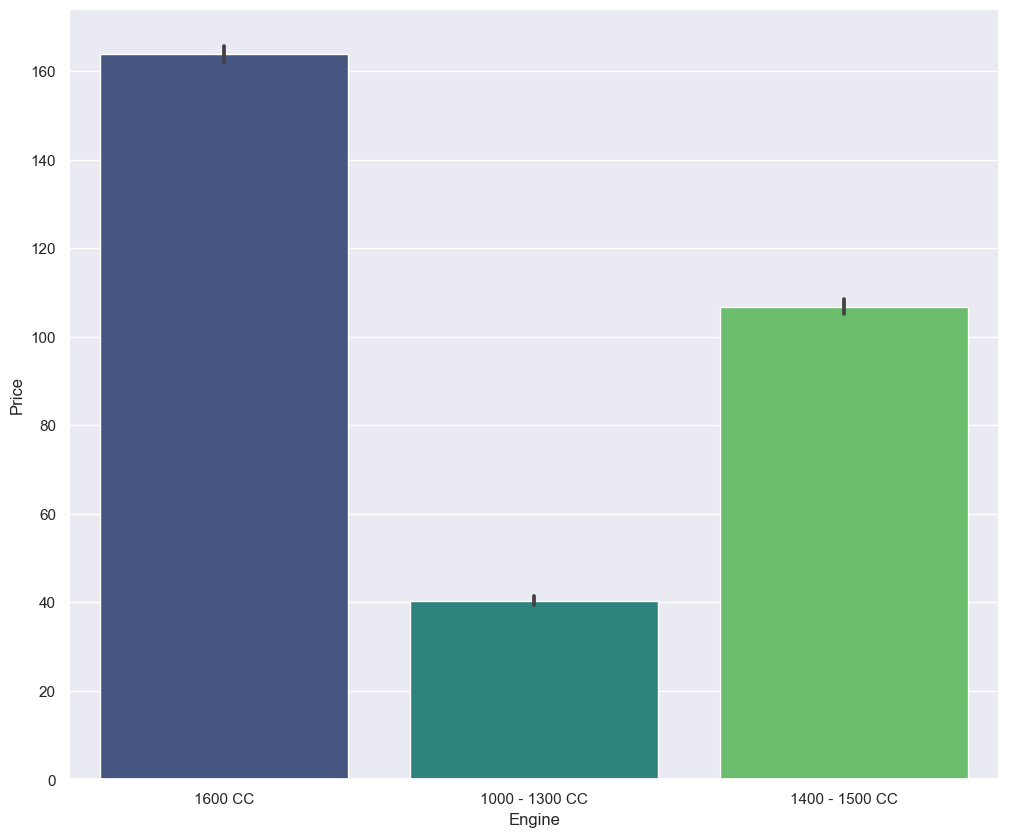

In [119]:
print(df.Engine.value_counts())
sns.barplot(x=df["Engine"],y=df["Price"],palette='viridis')

<Axes: >

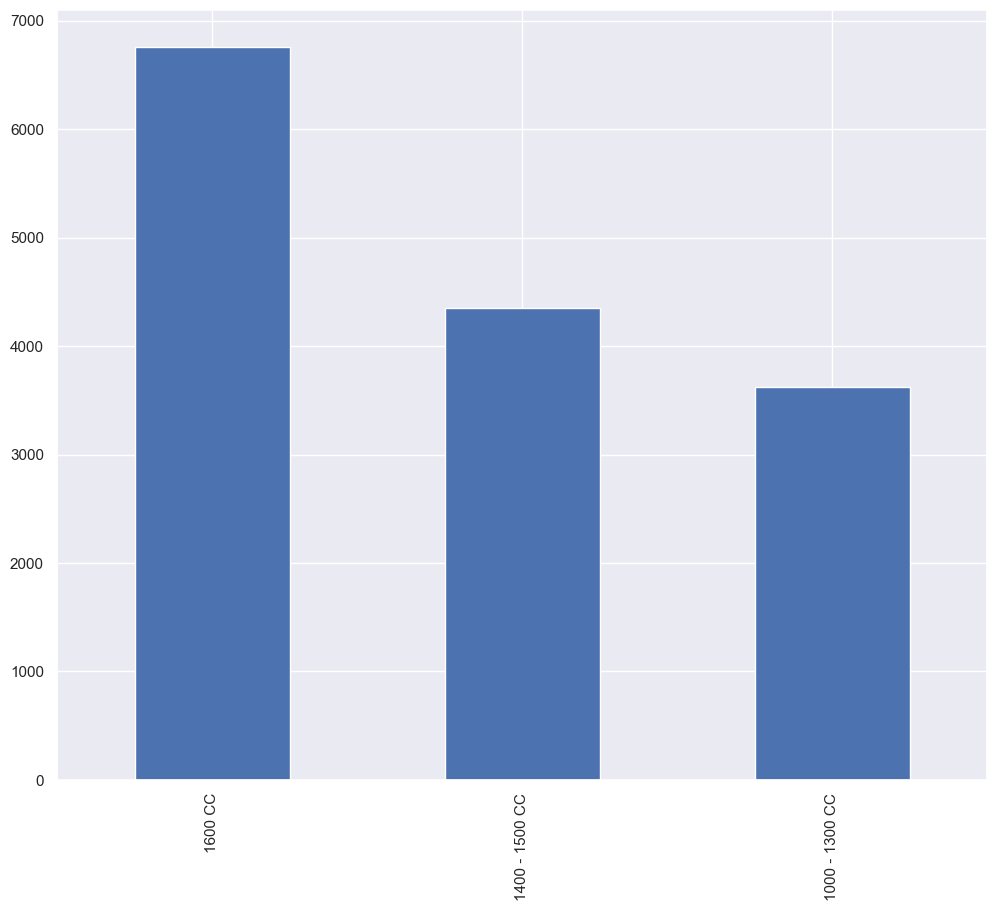

In [120]:
df['Engine'].value_counts().plot(kind="bar")

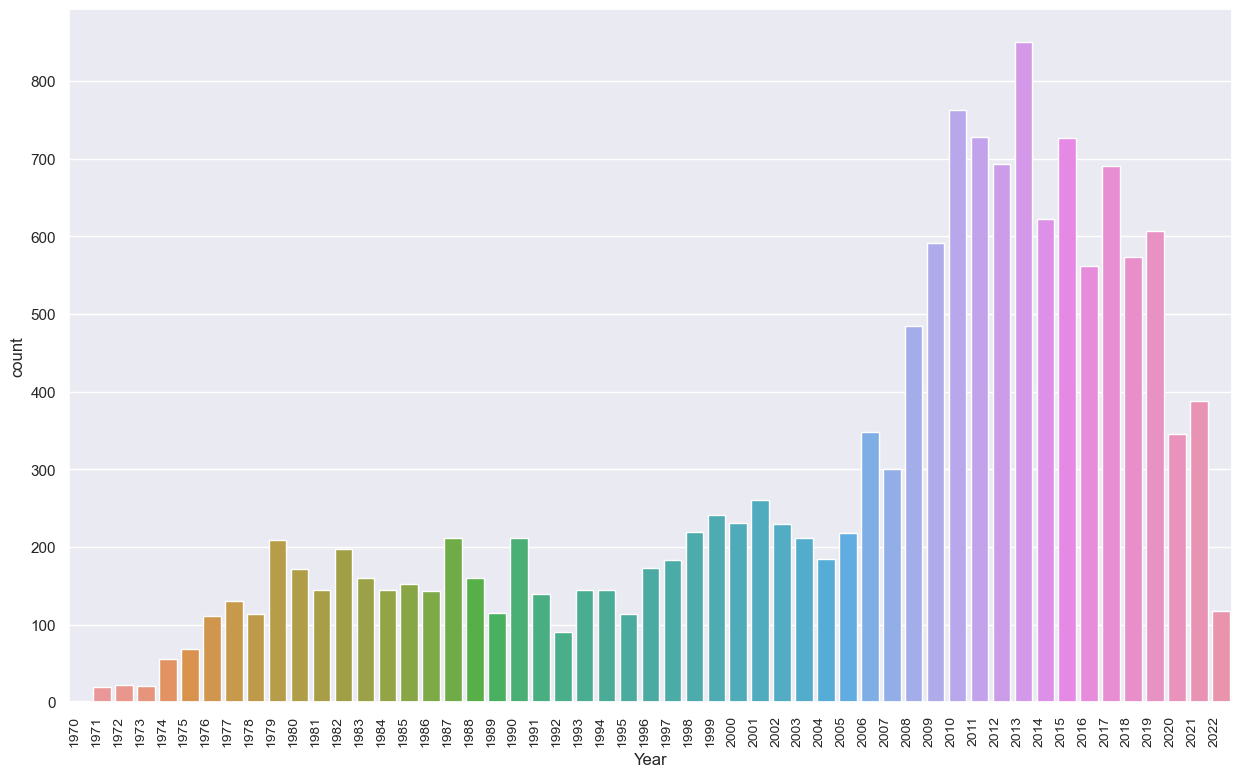

In [121]:
plt.figure(figsize=(15,9))
ax=sns.countplot(x='Year',data=df);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right",fontsize=10);

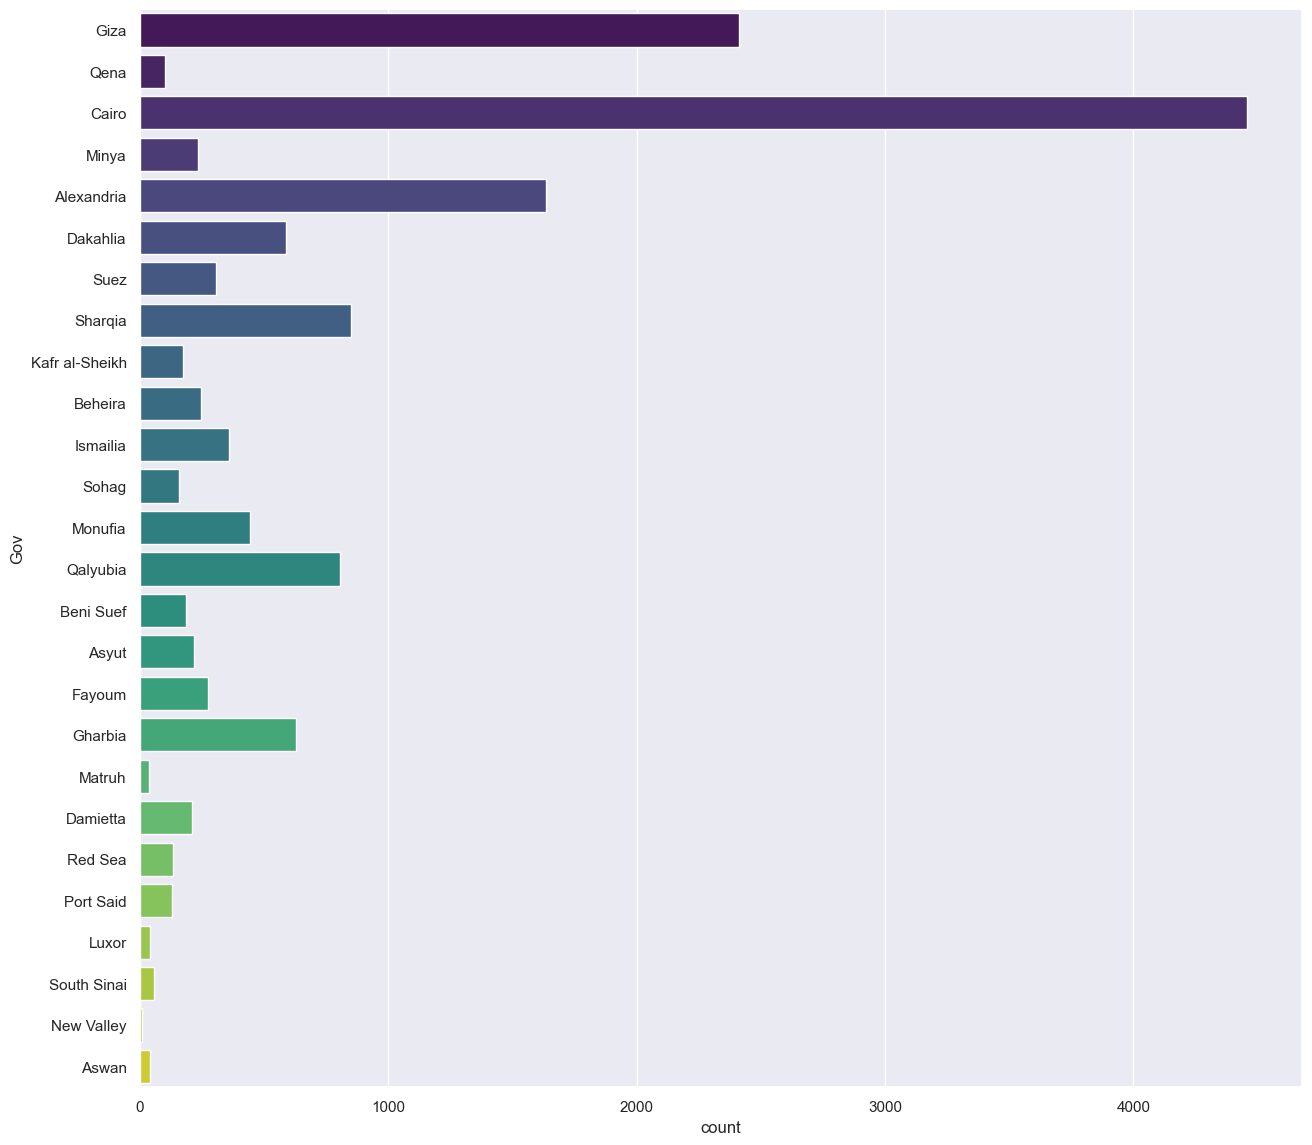

In [122]:
plt.figure(figsize=(15,14))
ax=sns.countplot(y=df["Gov"],palette='viridis');

<Axes: xlabel='Price', ylabel='Density'>

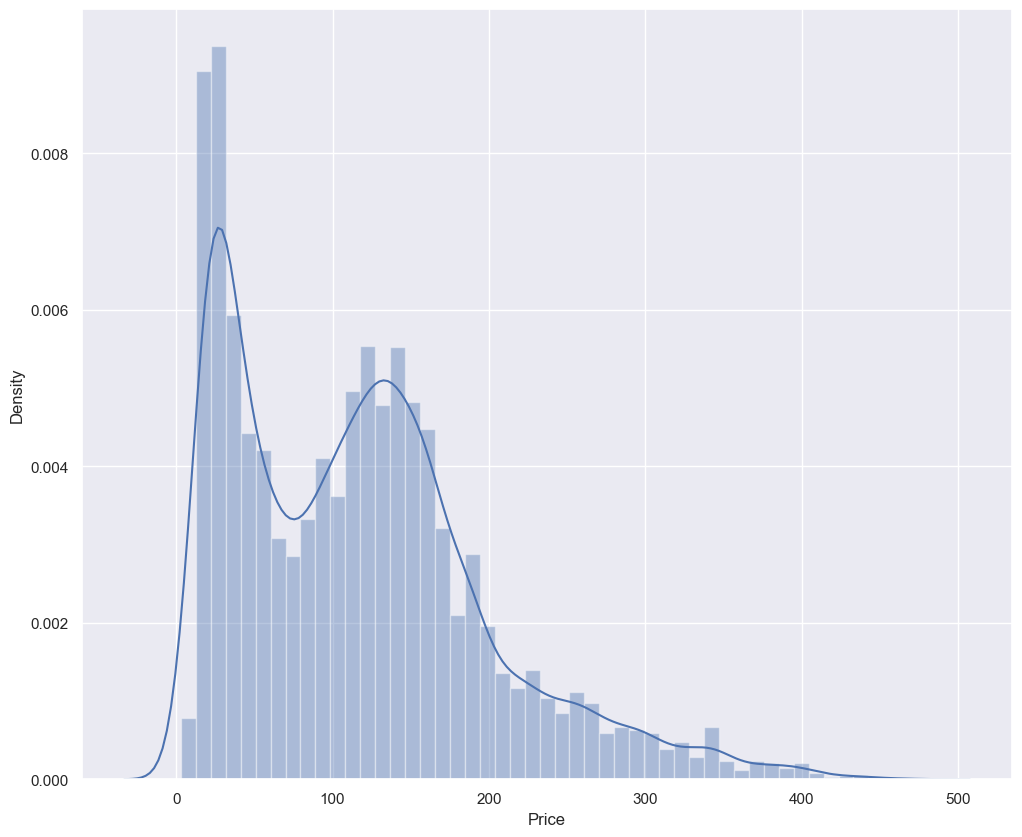

In [123]:
sns.distplot(df['Price'])

<Axes: xlabel='Year', ylabel='Density'>

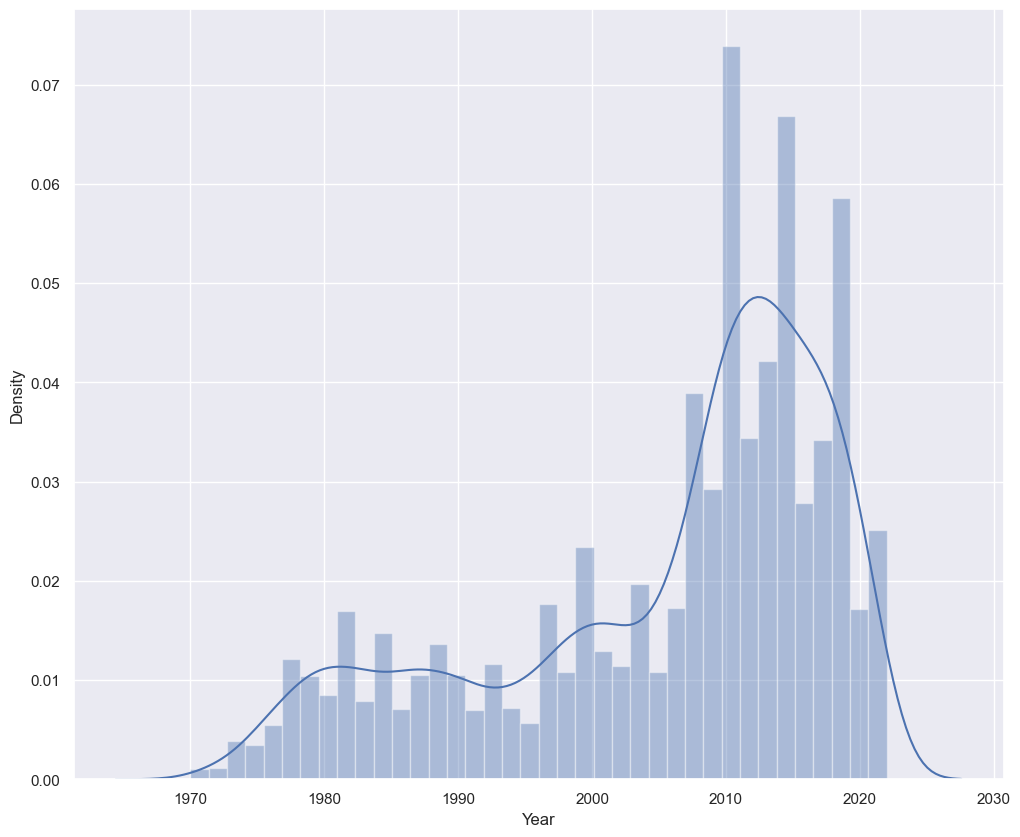

In [124]:
sns.distplot(df['Year'])

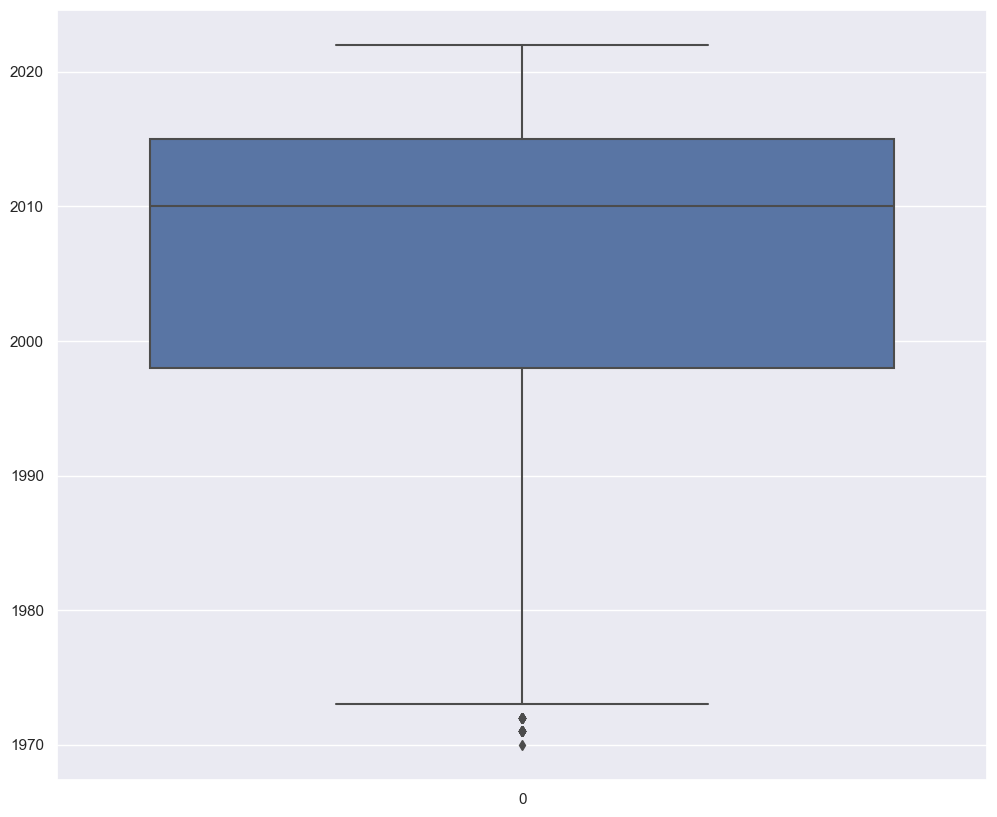

In [125]:
year_dist=sns.boxplot(df['Year'])

In [126]:
#Gov Doesn't affect the price of the used Car.
df=df.drop(labels='Gov',axis=1)

In [127]:
#preprocessing and feauture engineering 

In [128]:
df_copy=df.copy()

In [129]:
def kilometer_frmt(kilometers):
    meters = {
        '100000 to 119999' : 10 ,
        '90000 to 99999' : 9, 
        '120000 to 139999' : 11,
        'More than 200000' : 15,
        '10000 to 19999' : 1, 
        '180000 to 199999' : 14,
        '140000 to 159999' : 12, 
        '160000 to 179999' : 13, 
        '20000 to 29999' : 2,
        '30000 to 39999' : 3, 
        '80000 to 89999' : 8, 
        '70000 to 79999' : 7, 
        '0 to 9999' : 0 ,
        '60000 to 69999' : 6, 
        '40000 to 49999' : 4, 
        '50000 to 59999' : 5
    }
    return meters[kilometers]

In [130]:
def color_frmt(color):
    colors = {
        'White' : 0,
        'Black' : 1,
        'Silver' : 2,
        'Gray' : 3,
        'Red' : 4,
        'Blue- Navy Blue' : 5, 
        'Other Color' : 6,
        'Burgundy' :7,
        'Green' : 8,
        'Gold':9,
        'Beige':10, 
        'Brown' :11,
        'Yellow' : 12,
        'Orange' : 13
    }
    return colors[color]

In [131]:
def engine_size(engine):
    if engine == 'More than 3000 CC' :
        return 3.0
    elif engine =='1600 CC' :
        return 1.6
    elif engine == '1400 - 1500 CC' : 
        return 1.5
    elif engine == '1000 - 1300 CC' : 
        return 1.2
    elif engine == ' 1800 - 2000 CC' :
        return 2.0
    else : 
        return 2.5
    

In [132]:
def fuel_type(fuel) : 
    if fuel == 'Benzine' :
        return 1
    else:
        return 0

In [133]:
df_copy.sample(10)

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price
9987,Fiat,128,Sedan,White,1992,Benzine,160000 to 179999,1000 - 1300 CC,Manual,19.0
3532,Hyundai,Avante,Sedan,Gray,2019,Benzine,80000 to 89999,1600 CC,Automatic,322.0
6683,Chevrolet,Lanos,Sedan,Silver,2014,Natural Gas,More than 200000,1600 CC,Manual,90.0
5961,Chevrolet,Aveo,Sedan,Red,2010,Benzine,More than 200000,1400 - 1500 CC,Manual,110.0
7377,Chevrolet,Optra,Sedan,Blue- Navy Blue,2006,Benzine,0 to 9999,1600 CC,Manual,92.0
6078,Chevrolet,Aveo,Sedan,Gray,2010,Benzine,0 to 9999,1400 - 1500 CC,Manual,115.0
14004,Fiat,Shahin,Sedan,Burgundy,1998,Benzine,More than 200000,1400 - 1500 CC,Manual,25.3
2717,Hyundai,Verna,Sedan,Gray,2008,Benzine,80000 to 89999,1600 CC,Manual,161.4
4477,Hyundai,Excel,Sedan,Other Color,1998,Benzine,More than 200000,1400 - 1500 CC,Manual,49.5
12198,Fiat,Uno,Hatchback,Red,2001,Benzine,180000 to 199999,1000 - 1300 CC,Manual,55.0


In [134]:
def owner(year):
    if year > 2017:
        return 1 
    else:
        return 0

In [135]:
# Formating categorical features
df_copy.Kilometers = df_copy.Kilometers.apply(kilometer_frmt)
df_copy.Engine = df_copy.Engine.apply(engine_size)
df_copy.Fuel = df_copy.Fuel.apply(fuel_type)
df_copy.Brand = df_copy.Brand.map({'Hyundai' : 0 , 'Fiat' :1 , 'Chevrolet' :2})
df_copy.Body = df_copy.Body.map({'Sedan' : 0 , 'Hatchback' :1 , 'SUV' :2 , 'Coupe' :3 , 'Cabriolet':4})
df_copy.Transmission = df_copy.Transmission.map({'Automatic' : 1 , 'Manual':0})
df_copy.Color = df_copy.Color.apply(color_frmt)
# Features Engineerning
df_copy['Owner'] = df_copy.Year.apply(owner)
df_copy["Car Age"] = 2023 - df_copy["Year"]
df_copy = df_copy.drop(columns = ["Year"])
df['Price'] = df['Price'].apply(lambda e : round(e ,2))

In [136]:
df_copy.sample(10)

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Owner,Car Age
10743,1,128,0,5,1,15,1.2,0,18.0,0,40
11800,1,Shahin,0,8,1,1,1.5,0,40.0,0,27
4847,0,Verna,0,7,1,15,1.5,0,138.0,0,9
9020,2,Lanos,0,1,1,1,1.5,0,109.2,0,7
12363,1,128,0,0,1,14,1.2,0,19.6,0,44
3429,0,Accent,0,2,1,6,1.5,0,178.2,0,10
8622,2,Lanos,0,2,1,13,1.5,0,115.0,0,8
4782,0,Verna,0,1,1,11,1.6,0,126.5,0,8
13913,1,Shahin,0,0,1,1,1.5,0,55.2,0,24
7241,2,Optra,0,2,1,0,1.6,1,115.0,1,5


In [137]:
df_copy.dtypes

Brand             int64
Model            object
Body              int64
Color             int64
Fuel              int64
Kilometers        int64
Engine          float64
Transmission      int64
Price           float64
Owner             int64
Car Age           int64
dtype: object

In [138]:
#Converting Categorical to numerical to understand word labels. 
#label_encoder
nums=[]
lbl=LabelEncoder()
for col in df_copy.loc[ : , df_copy.dtypes == np.object].columns :
    df_copy[col] = lbl.fit_transform(df_copy[col])
    directory = {label : index for index , label in enumerate(lbl.classes_)}
    nums.append(directory)
nums

[{'128': 0,
  '131': 1,
  'Accent': 2,
  'Avante': 3,
  'Aveo': 4,
  'Cruze': 5,
  'Elantra': 6,
  'Excel': 7,
  'I10': 8,
  'Lanos': 9,
  'Matrix': 10,
  'Optra': 11,
  'Punto': 12,
  'Shahin': 13,
  'Tipo': 14,
  'Tucson': 15,
  'Uno': 16,
  'Verna': 17}]

In [139]:
df_copy

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Owner,Car Age
0,0,2,0,1,1,12,1.6,1,140.0,0,16
1,0,2,0,2,1,14,1.2,0,78.0,0,18
2,0,2,0,3,1,12,1.5,0,70.0,0,24
3,0,2,0,5,1,12,1.6,1,150.0,0,14
4,0,2,0,2,1,1,1.2,0,75.0,0,23
...,...,...,...,...,...,...,...,...,...,...,...
14736,1,16,1,7,1,13,1.2,0,46.0,0,26
14737,1,16,1,2,1,2,1.2,0,46.0,0,27
14738,1,16,1,7,1,1,1.2,0,43.7,0,30
14739,1,16,1,2,1,1,1.2,0,69.0,0,27


<Axes: >

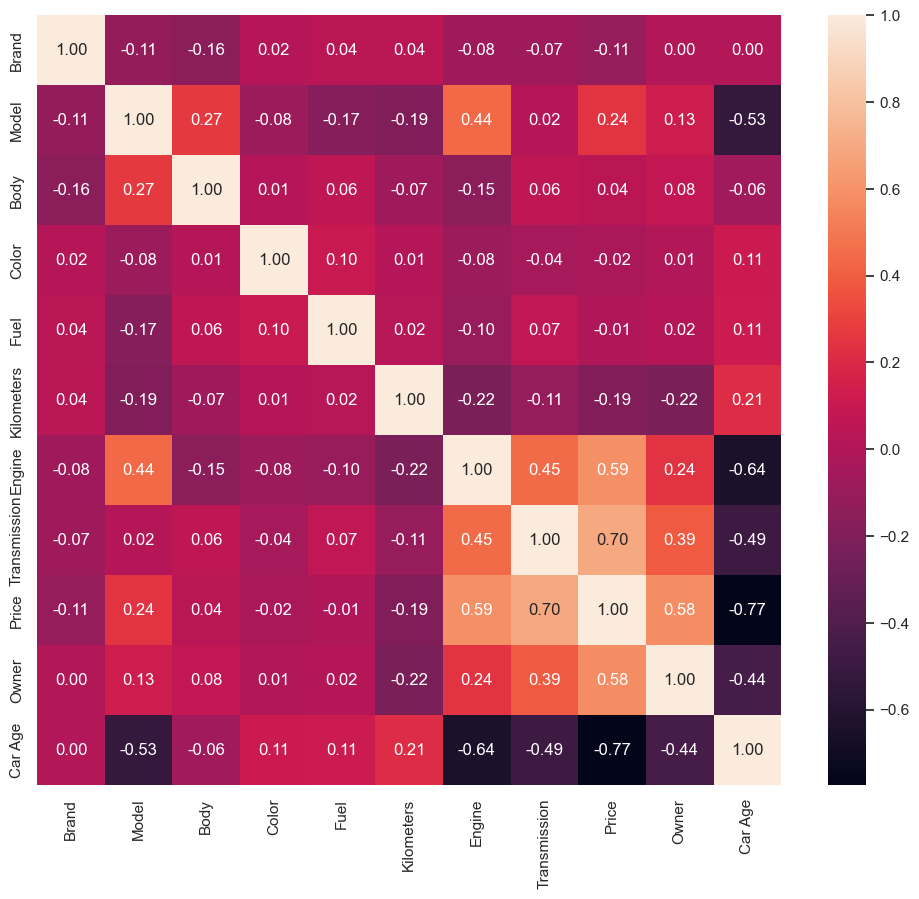

In [140]:
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

<Axes: xlabel='Model', ylabel='Density'>

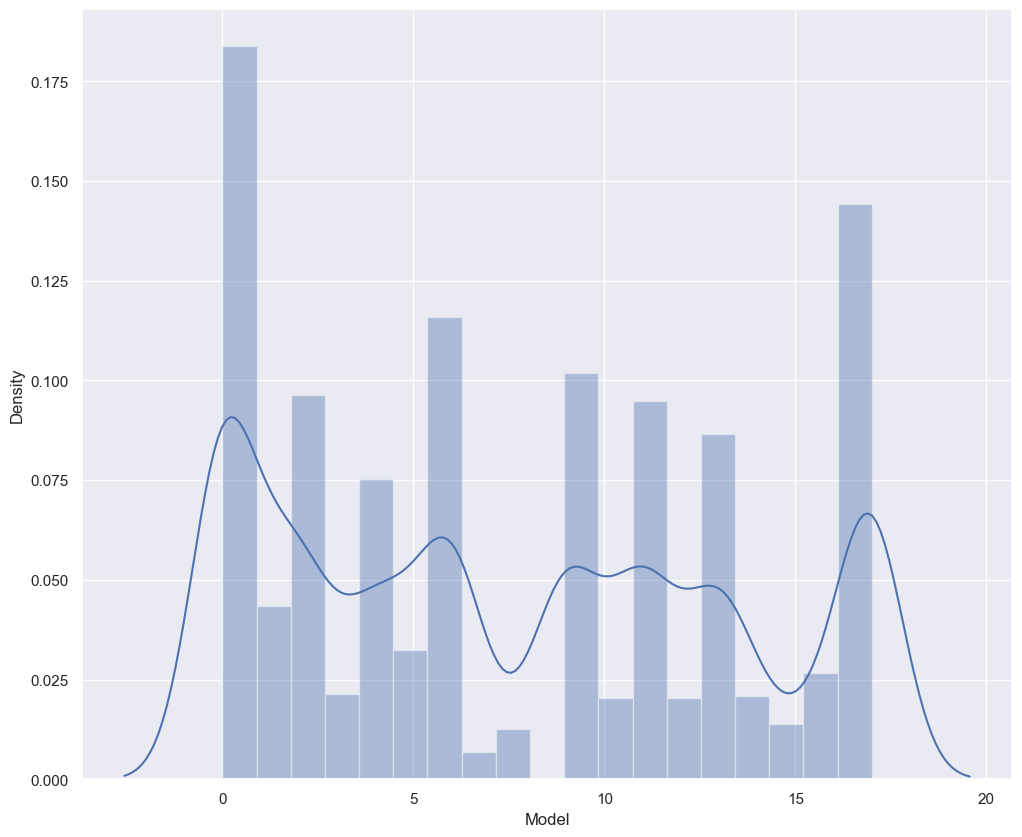

In [141]:
sns.distplot(df_copy['Model'])

<Axes: xlabel='Color', ylabel='Density'>

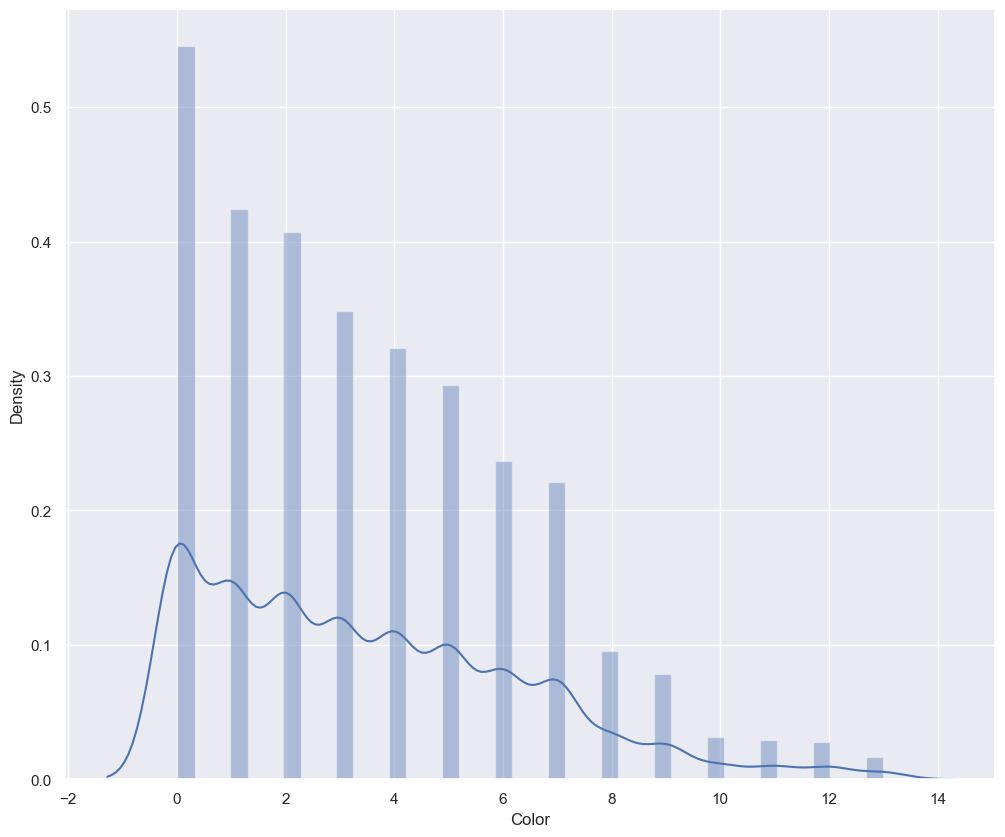

In [142]:
sns.distplot(df_copy['Color'])

<Axes: xlabel='Kilometers', ylabel='Density'>

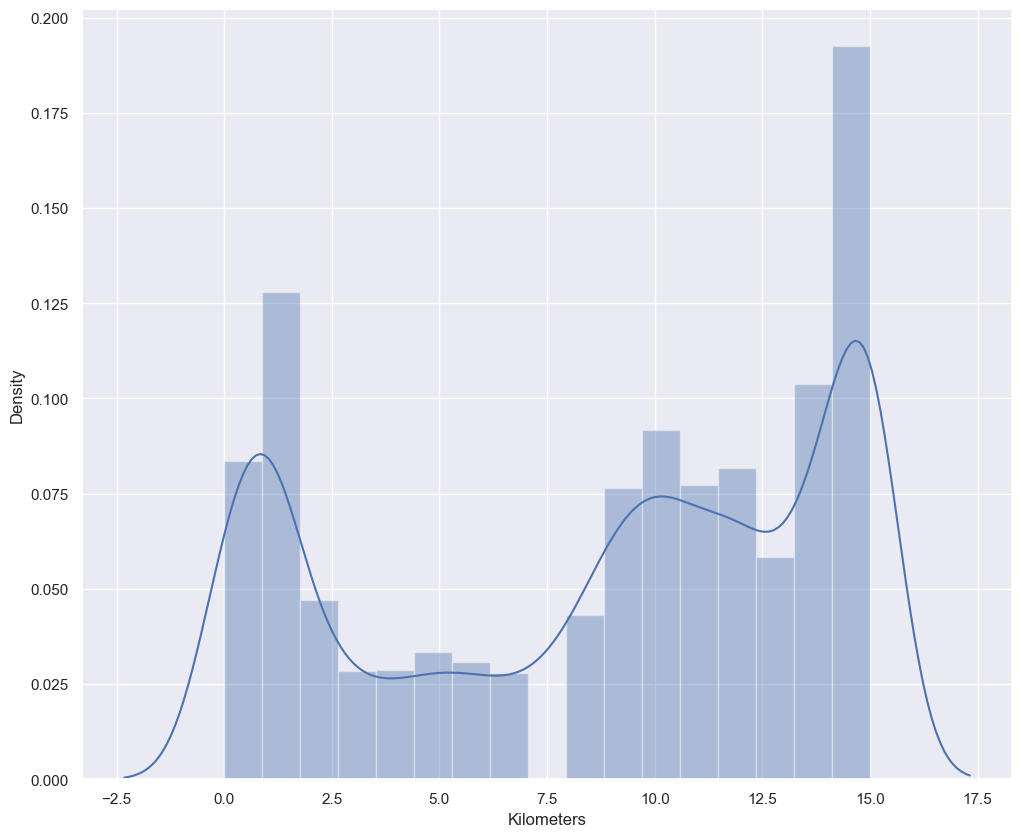

In [143]:
sns.distplot(df_copy['Kilometers'])

<Axes: xlabel='Engine', ylabel='Density'>

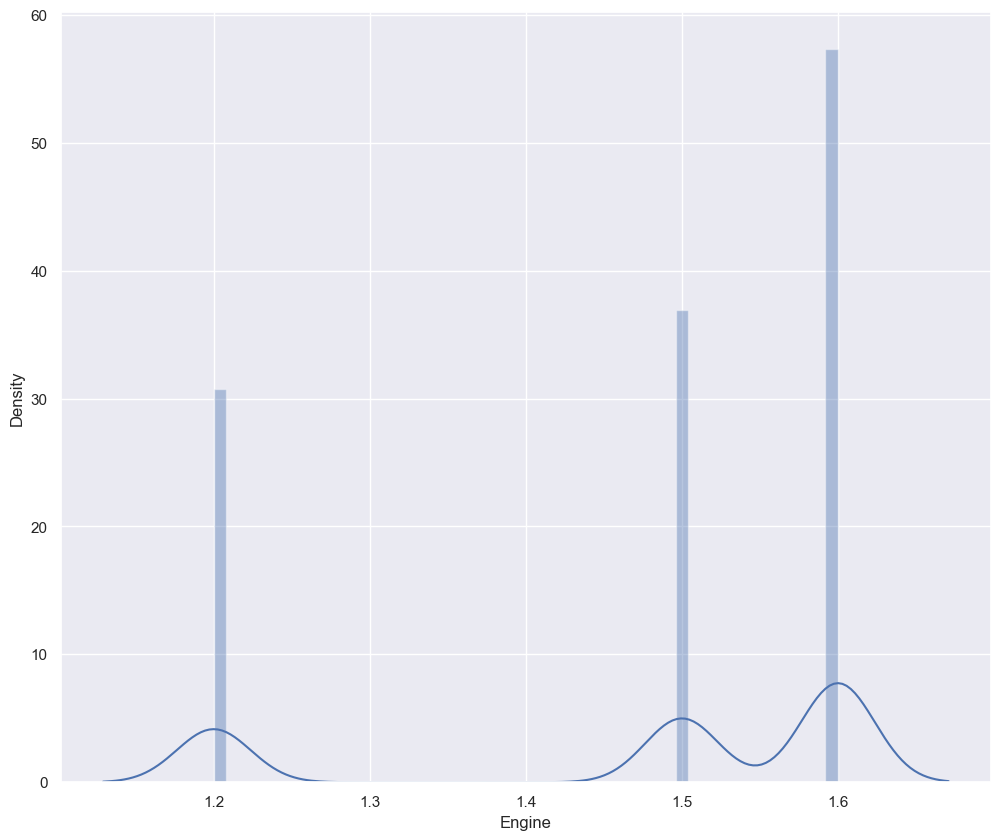

In [144]:
sns.distplot(df_copy['Engine'])

<Axes: xlabel='Body', ylabel='Density'>

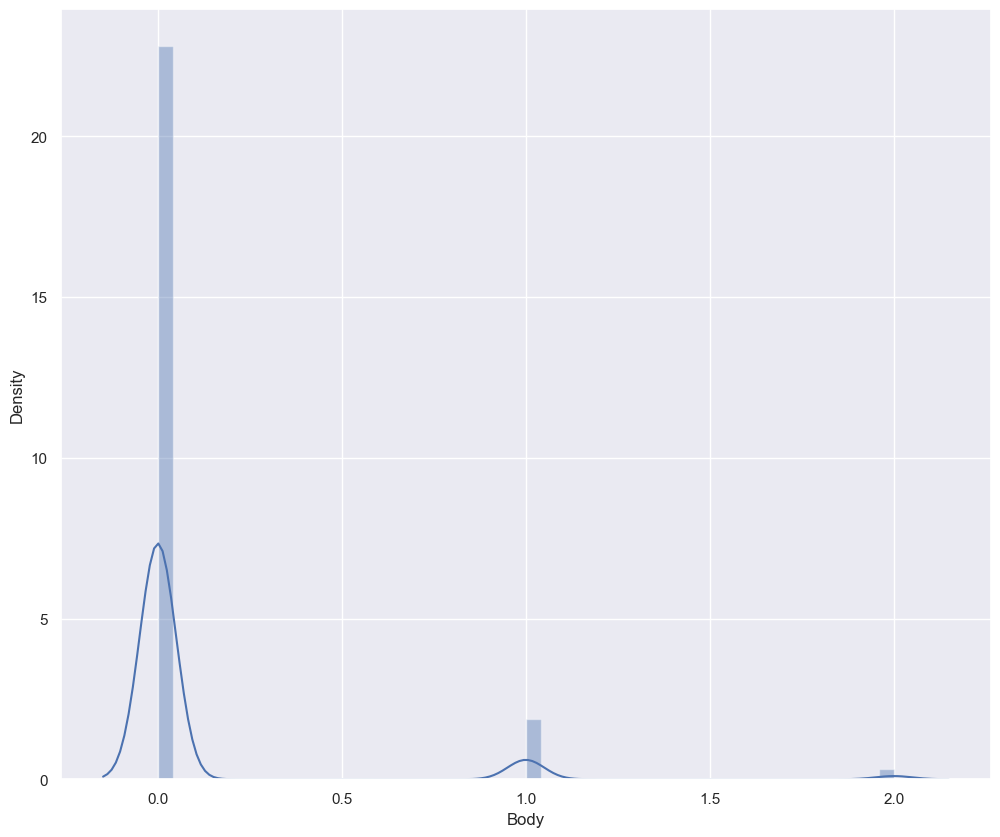

In [145]:
sns.distplot(df_copy['Body'])

<Axes: xlabel='Fuel', ylabel='Density'>

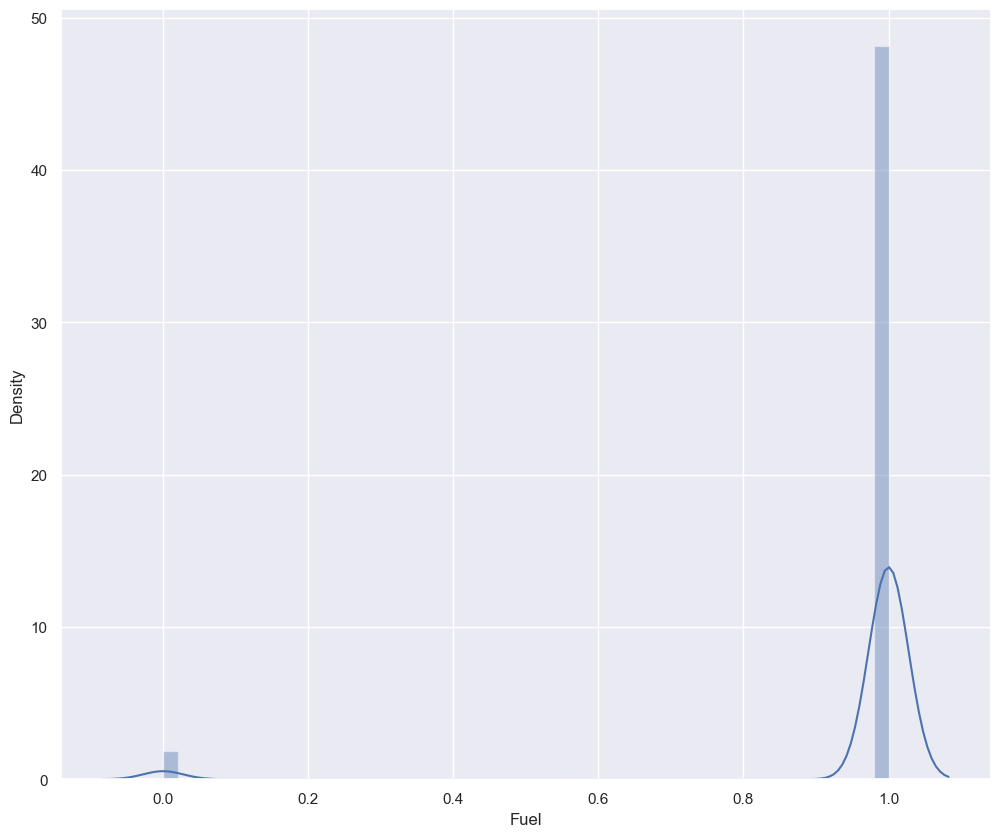

In [146]:
sns.distplot(df_copy['Fuel'])

<Axes: xlabel='Car Age', ylabel='Density'>

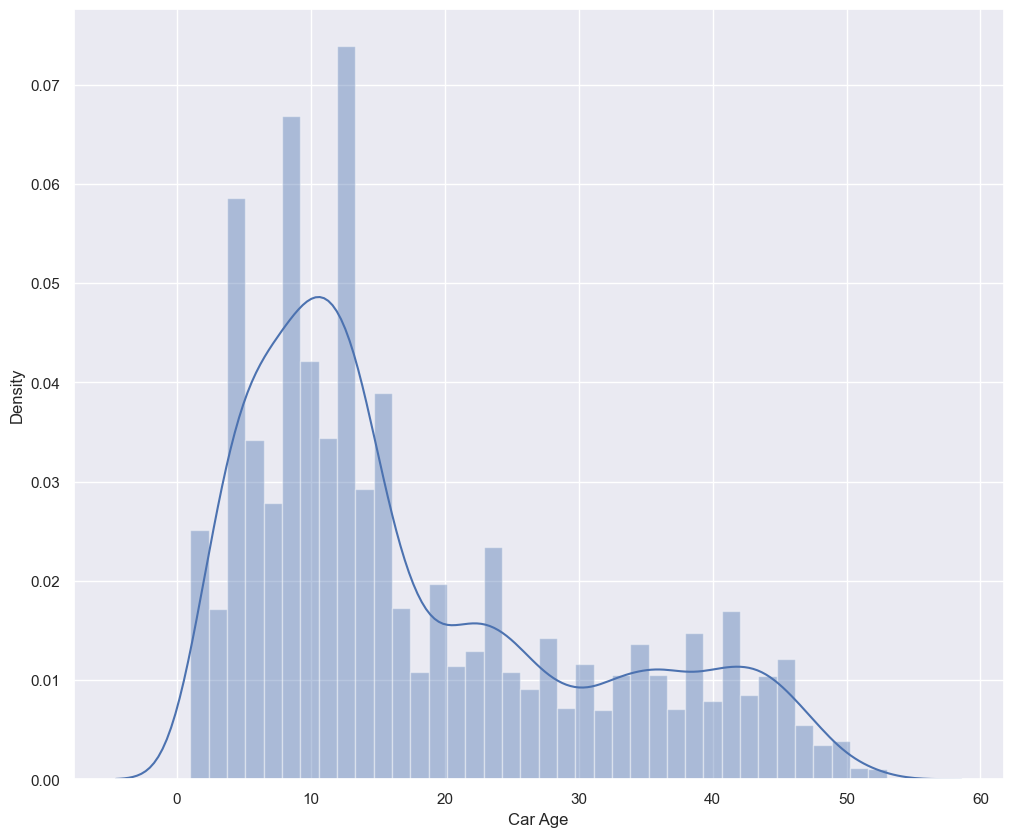

In [147]:
sns.distplot(df_copy['Car Age'])

In [148]:
#Modeling
x=df_copy.drop(columns = ['Price'])
y=df_copy[['Price']]

In [149]:
x

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Owner,Car Age
0,0,2,0,1,1,12,1.6,1,0,16
1,0,2,0,2,1,14,1.2,0,0,18
2,0,2,0,3,1,12,1.5,0,0,24
3,0,2,0,5,1,12,1.6,1,0,14
4,0,2,0,2,1,1,1.2,0,0,23
...,...,...,...,...,...,...,...,...,...,...
14736,1,16,1,7,1,13,1.2,0,0,26
14737,1,16,1,2,1,2,1.2,0,0,27
14738,1,16,1,7,1,1,1.2,0,0,30
14739,1,16,1,2,1,1,1.2,0,0,27


In [150]:
y

,Price
0,140.0
1,78.0
2,70.0
3,150.0
4,75.0
...,...
14736,46.0
14737,46.0
14738,43.7
14739,69.0


In [151]:
#Standrization
std = StandardScaler()
x= pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Owner,Car Age
0,-1.103026,-0.963439,-0.294743,-0.846956,0.195189,0.627322,0.794016,1.421730,-0.399972,-0.121941
1,-1.103026,-0.963439,-0.294743,-0.503150,0.195189,1.006810,-1.689981,-0.703368,-0.399972,0.036098
2,-1.103026,-0.963439,-0.294743,-0.159344,0.195189,0.627322,0.173017,-0.703368,-0.399972,0.510213
3,-1.103026,-0.963439,-0.294743,0.528269,0.195189,0.627322,0.794016,1.421730,-0.399972,-0.279980
4,-1.103026,-0.963439,-0.294743,-0.503150,0.195189,-1.459860,-1.689981,-0.703368,-0.399972,0.431194
...,...,...,...,...,...,...,...,...,...,...
14736,0.141498,1.436107,2.660909,1.215881,0.195189,0.817066,-1.689981,-0.703368,-0.399972,0.668252
14737,0.141498,1.436107,2.660909,-0.503150,0.195189,-1.270116,-1.689981,-0.703368,-0.399972,0.747271
14738,0.141498,1.436107,2.660909,1.215881,0.195189,-1.459860,-1.689981,-0.703368,-0.399972,0.984329
14739,0.141498,1.436107,2.660909,-0.503150,0.195189,-1.459860,-1.689981,-0.703368,-0.399972,0.747271


In [152]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11792, 10)
(2949, 10)
(11792, 1)
(2949, 1)


In [153]:
models = {
    "LinearRegressor" : LinearRegression(),
    "KNeighbortsRegressor" : KNeighborsRegressor(),
    "decisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : xgboost.XGBRegressor()
}

In [157]:
for name,model in models.items():
    print('_'*90)
    print(f'---------- Evaluation Scores Of  : {name} ----------')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'{name}  test Scores : { cross_val_score(model,x,y.values.ravel(),cv=4)} accuracy' )
    print(f'R2 Score: {round(r2_score(y_test , y_pred)*100,1)} %')
    print(f'MSE of {name} is : {mean_squared_error(y_test,y_pred)}')
    print(f'MAE of {name} is : {mean_absolute_error(y_test,y_pred)}')
    print(f'RMSE of {name} is  : {sqrt(mean_squared_error(y_test,y_pred))}')
    print('_'*90)

__________________________________________________________________________________________
---------- Evaluation Scores Of  : LinearRegressor ----------
LinearRegressor  test Scores : [0.58325489 0.59285347 0.85310879 0.7042753 ] accuracy
R2 Score: 78.5 %
MSE of LinearRegressor is : 1444.0934210876342
MAE of LinearRegressor is : 25.60588167873026
RMSE of LinearRegressor is  : 38.00122920495644
__________________________________________________________________________________________
__________________________________________________________________________________________
---------- Evaluation Scores Of  : KNeighbortsRegressor ----------
KNeighbortsRegressor  test Scores : [0.67718343 0.69851224 0.91737383 0.61500248] accuracy
R2 Score: 89.5 %
MSE of KNeighbortsRegressor is : 705.9229824347236
MAE of KNeighbortsRegressor is : 15.641749745676503
RMSE of KNeighbortsRegressor is  : 26.569211174491492
_________________________________________________________________________________________

In [155]:
xgb= xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("Accuracy on tested data = {:,.1f}".format(xgb.score(x_test,y_test)*100),'%')

Accuracy on tested data = 92.3 %
